In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from time import time
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
pred = {'pred': [1, 2,3 ,4]}

In [24]:
data = pd.read_csv('./server/data/regression_houses_2020/train_data.csv')
y_data = pd.read_csv('./server/data/regression_houses_2020/train_target.csv')

In [25]:
y_data.drop(['index'], axis = 1, inplace=True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,
                                                    train_size=0.8,
                                                    random_state=241)

In [27]:
X_train = pd.concat([y_train, X_train], axis = 1)

In [28]:
X_train

,price,bedrooms_number,batchrooms_number,square_footage_home,square_footage_lot,floors_number,has_waterfront,has_been_viewed,condition_quality,housing_unity_grade,square_footage_except_basement,square_footage_only_basement,build_year,renovation_year,coordinate_latitude,coordinate_longitude,square_footage_home_old,square_footage_lot_old
16491,642.00,4,2.50,2120,15000,2.0,0,0,4,8,2120,0,1983,0,200.7159,4.900,2170,15000
9896,1190.00,3,2.50,2510,4600,2.0,0,2,3,10,2510,0,2006,0,200.7051,4.777,2560,7500
6653,429.95,5,3.50,2760,3865,2.5,0,0,3,8,2760,0,2013,0,200.5049,4.830,2590,4587
16592,1365.00,2,1.75,2620,14138,2.0,1,4,3,8,2120,500,1931,1991,200.7142,4.723,1830,8279
15414,620.00,4,2.25,2360,15860,1.0,0,0,3,9,2360,0,1977,0,200.6307,4.949,2650,11798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8664,584.00,2,2.50,1280,1051,2.0,0,0,3,8,1080,200,2009,0,200.6273,4.641,1580,1279
8690,618.20,3,2.75,2050,3320,1.5,0,0,4,7,1580,470,1927,0,200.6719,4.699,1760,4150
144,224.90,4,1.50,1120,5427,1.0,0,0,3,6,1120,0,1969,2014,200.3628,4.913,1150,5304
10987,902.00,4,2.50,2820,6120,2.0,0,0,3,9,2820,0,2014,0,200.6911,4.707,1510,6120


In [29]:
X_train.to_csv('./server/data/regression_houses_2020/X_train.csv', index=False)
X_test.to_csv('./server/data/regression_houses_2020/X_test.csv', index=False)

In [30]:
np.random.randint(0, 10, 10)

array([0, 1, 2, 2, 6, 1, 6, 1, 5, 6])

# 1) Предобработка данных

In [52]:
data = pd.read_csv('regression_houses_2020/train_data.csv')
y_data = pd.read_csv('regression_houses_2020/train_target.csv')

In [4]:
data.head()

,index,id,date,bedrooms_number,batchrooms_number,square_footage_home,square_footage_lot,floors_number,has_waterfront,has_been_viewed,condition_quality,housing_unity_grade,square_footage_except_basement,square_footage_only_basement,build_year,renovation_year,coordinate_latitude,coordinate_longitude,square_footage_home_old,square_footage_lot_old
0,0,16530,2014-05-02,2,2.00,1350,2560,1.0,0,0,3,8,1350,0,1976,0,200.6344,4.893,1790,2560
1,1,3651,2014-05-02,3,1.75,1800,23103,1.0,0,0,3,7,1800,0,1968,0,200.6517,5.094,1410,18163
2,2,13568,2014-05-02,3,1.75,2240,10578,2.0,0,0,5,8,1550,690,1923,0,200.6954,4.708,1570,10578
3,3,20352,2014-05-02,4,2.00,1820,5000,1.5,0,1,3,7,1640,180,1945,0,200.6815,4.731,2060,5000
4,4,10524,2014-05-02,4,1.75,1560,8700,1.0,0,0,4,7,1560,0,1967,0,200.7274,4.819,2080,8000


In [5]:
y_data.head()

,index,price
0,0,340.0
1,1,289.0
2,2,755.0
3,3,655.0
4,4,387.5


In [6]:
data.drop(columns=['index', 'id', 'date'], inplace=True)
y_data.drop(columns=['index'], inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.values, y_data.values.reshape(-1), 
                                                    train_size=0.8,
                                                    random_state=241)

In [8]:
type(X_test)

numpy.ndarray

In [9]:
def rmse(y_true, y_pred):
    return np.mean((y_pred - y_true) ** 2) ** 0.5

# 2) RandomForestMSE

### RMSE and time (n_estimators)

In [41]:
n_estimators_range = np.arange(1, 100, 3)

rmse_n_estimators = {'rmse':[], 'n_estimators': [], 'time' : []}

for n in tqdm(n_estimators_range):
    begin = time()
    algo = RandomForestMSE(n_estimators=n)
    algo.fit(X_train, y_train)
    pred = algo.predict(X_test)
    end = time()
    rmse_n_estimators['time'].append(end - begin)
    rmse_n_estimators['rmse'].append(rmse(y_test, pred))
    rmse_n_estimators['n_estimators'].append(n)
    

100%|██████████| 33/33 [00:57<00:00,  1.75s/it]


/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


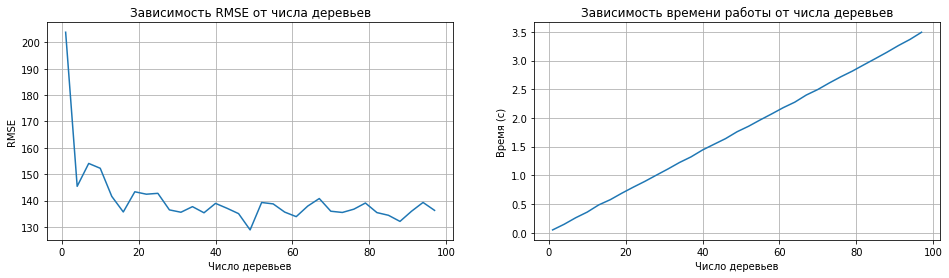

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ax[0].plot(rmse_n_estimators['n_estimators'], rmse_n_estimators['rmse'])

ax[0].set_title('Зависимость RMSE от числа деревьев')
ax[0].set_xlabel('Число деревьев')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)


ax[1].plot(rmse_n_estimators['n_estimators'], rmse_n_estimators['time'])

ax[1].set_title('Зависимость времени работы от числа деревьев')
ax[1].set_xlabel('Число деревьев')
ax[1].set_ylabel('Время (с)')
ax[1].grid(True)

fig.show()

plt.savefig('plots/RF_rmse_time_n_estimators.pdf')

### RMSE and time (размерность подвыборки признаков)

In [54]:
feature_subsample_size_range = np.arange(1, 17, 1)

rmse_ndim = {'rmse':[], 'feature_subsample_size': [], 'time' : []}

for n in tqdm(feature_subsample_size_range):
    begin = time()
    algo = RandomForestMSE(feature_subsample_size=n, n_estimators = 20)
    algo.fit(X_train, y_train)
    pred = algo.predict(X_test)
    end = time()
    rmse_ndim['time'].append(end - begin)
    rmse_ndim['rmse'].append(rmse(y_test, pred))
    rmse_ndim['feature_subsample_size'].append(n)
    

100%|██████████| 16/16 [00:06<00:00,  2.47it/s]


/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


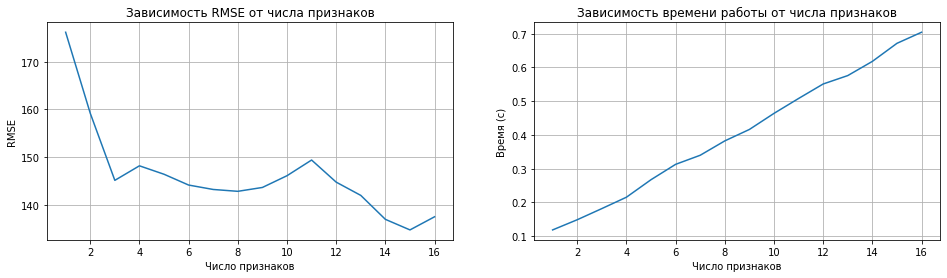

In [57]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ax[0].plot(rmse_ndim['feature_subsample_size'], rmse_ndim['rmse'])

ax[0].set_title('Зависимость RMSE от числа признаков')
ax[0].set_xlabel('Число признаков')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)


ax[1].plot(rmse_ndim['feature_subsample_size'], rmse_ndim['time'])

ax[1].set_title('Зависимость времени работы от числа признаков')
ax[1].set_xlabel('Число признаков')
ax[1].set_ylabel('Время (с)')
ax[1].grid(True)

fig.show()

plt.savefig('plots/RF_rmse_time_ndim.pdf')

### RMSE and time (глубина дерева)

In [59]:
max_depth_range = list(np.arange(1, 100, 2))
max_depth_range.append(None)

rmse_depth = {'rmse':[], 'max_depth': [], 'time' : []}

for n in tqdm(max_depth_range):
    begin = time()
    algo = RandomForestMSE(max_depth=n, n_estimators = 20)
    algo.fit(X_train, y_train)
    pred = algo.predict(X_test)
    end = time()
    rmse_depth['time'].append(end - begin)
    rmse_depth['rmse'].append(rmse(y_test, pred))
    rmse_depth['max_depth'].append(n)
    

100%|██████████| 51/51 [00:33<00:00,  1.51it/s]


/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


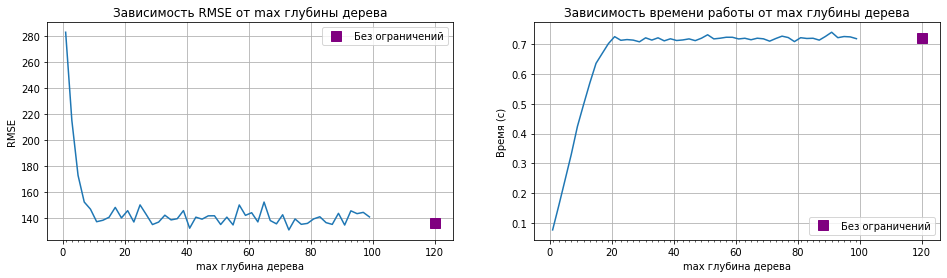

In [96]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ticks = deepcopy(max_depth_range[:-1])
ticks += [120]
ax[0].plot(rmse_depth['max_depth'][:-1], rmse_depth['rmse'][:-1])

ax[0].set_title('Зависимость RMSE от max глубины дерева')
ax[0].set_xlabel('max глубина дерева')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)
ax[0].plot(ticks[-1], rmse_depth['rmse'][-1], 's', color = 'purple', 
           markersize = 10, label = 'Без ограничений')

ax[0].set_xticks(ticks, minor=True)
ax[0].legend()

ax[1].plot(rmse_depth['max_depth'], rmse_depth['time'])

ax[1].set_title('Зависимость времени работы от max глубины дерева')
ax[1].set_xlabel('max глубина дерева')
ax[1].set_ylabel('Время (с)')
ax[1].grid(True)
ax[1].plot(ticks[-1], rmse_depth['time'][-1], 's', color = 'purple',
           markersize = 10, label = 'Без ограничений')


ax[1].set_xticks(ticks, minor=True)
ax[1].legend()
fig.show()

plt.savefig('plots/RF_rmse_time_depth.pdf')

# 3) GradientBoostingMSE

### RMSE and time (n_estimators)

In [19]:
import ensembles
import imp

In [26]:
imp.reload(ensembles)
from ensembles import RandomForestMSE, GradientBoostingMSE

In [27]:
n_estimators_range = np.arange(1, 100, 3)

rmse_n_estimators = {'rmse':[], 'n_estimators': [], 'time' : []}

for n in tqdm(n_estimators_range):
    begin = time()
    algo = GradientBoostingMSE(n_estimators=n)
    algo.fit(X_train, y_train)
    pred = algo.predict(X_test)
    end = time()
    rmse_n_estimators['time'].append(end - begin)
    rmse_n_estimators['rmse'].append(rmse(y_test, pred))
    rmse_n_estimators['n_estimators'].append(n)
    

100%|██████████| 33/33 [00:21<00:00,  1.55it/s]


/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


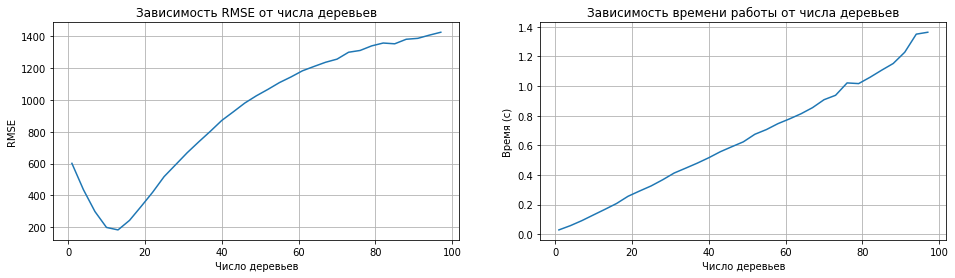

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ax[0].plot(rmse_n_estimators['n_estimators'], rmse_n_estimators['rmse'])

ax[0].set_title('Зависимость RMSE от числа деревьев')
ax[0].set_xlabel('Число деревьев')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)


ax[1].plot(rmse_n_estimators['n_estimators'], rmse_n_estimators['time'])

ax[1].set_title('Зависимость времени работы от числа деревьев')
ax[1].set_xlabel('Число деревьев')
ax[1].set_ylabel('Время (с)')
ax[1].grid(True)

fig.show()

plt.savefig('plots/GB_rmse_time_n_estimators.pdf')

### RMSE and time (размерность подвыборки признаков)

In [30]:
feature_subsample_size_range = np.arange(1, 17, 1)

rmse_ndim = {'rmse':[], 'feature_subsample_size': [], 'time' : []}

for n in tqdm(feature_subsample_size_range):
    begin = time()
    algo = GradientBoostingMSE(feature_subsample_size=n, n_estimators = 20)
    algo.fit(X_train, y_train)
    pred = algo.predict(X_test)
    end = time()
    rmse_ndim['time'].append(end - begin)
    rmse_ndim['rmse'].append(rmse(y_test, pred))
    rmse_ndim['feature_subsample_size'].append(n)
    

100%|██████████| 16/16 [00:02<00:00,  6.65it/s]


/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


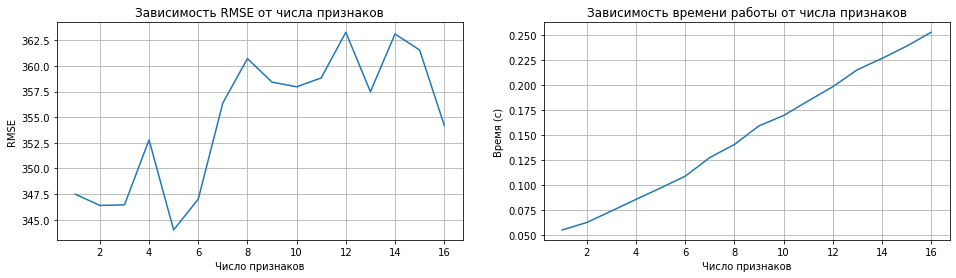

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ax[0].plot(rmse_ndim['feature_subsample_size'], rmse_ndim['rmse'])

ax[0].set_title('Зависимость RMSE от числа признаков')
ax[0].set_xlabel('Число признаков')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)


ax[1].plot(rmse_ndim['feature_subsample_size'], rmse_ndim['time'])

ax[1].set_title('Зависимость времени работы от числа признаков')
ax[1].set_xlabel('Число признаков')
ax[1].set_ylabel('Время (с)')
ax[1].grid(True)

fig.show()

plt.savefig('plots/GB_rmse_time_ndim.pdf')

### RMSE and time (глубина дерева)

In [32]:
max_depth_range = list(np.arange(1, 100, 2))
max_depth_range.append(None)

rmse_depth = {'rmse':[], 'max_depth': [], 'time' : []}

for n in tqdm(max_depth_range):
    begin = time()
    algo = GradientBoostingMSE(max_depth=n, n_estimators = 20)
    algo.fit(X_train, y_train)
    pred = algo.predict(X_test)
    end = time()
    rmse_depth['time'].append(end - begin)
    rmse_depth['rmse'].append(rmse(y_test, pred))
    rmse_depth['max_depth'].append(n)
    

100%|██████████| 51/51 [00:36<00:00,  1.38it/s]


/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


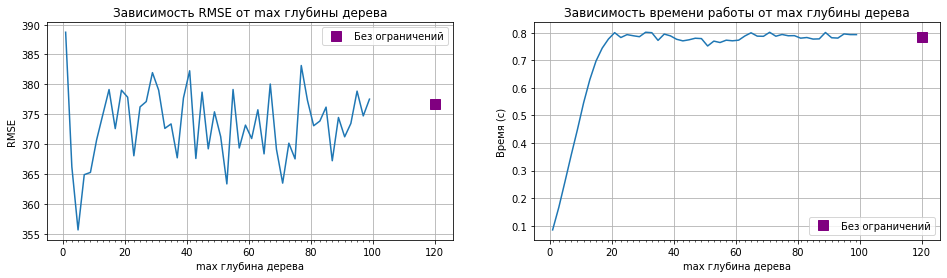

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ticks = deepcopy(max_depth_range[:-1])
ticks += [120]
ax[0].plot(rmse_depth['max_depth'][:-1], rmse_depth['rmse'][:-1])

ax[0].set_title('Зависимость RMSE от max глубины дерева')
ax[0].set_xlabel('max глубина дерева')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)
ax[0].plot(ticks[-1], rmse_depth['rmse'][-1], 's', color = 'purple', 
           markersize = 10, label = 'Без ограничений')

ax[0].set_xticks(ticks, minor=True)
ax[0].legend()

ax[1].plot(rmse_depth['max_depth'], rmse_depth['time'])

ax[1].set_title('Зависимость времени работы от max глубины дерева')
ax[1].set_xlabel('max глубина дерева')
ax[1].set_ylabel('Время (с)')
ax[1].grid(True)
ax[1].plot(ticks[-1], rmse_depth['time'][-1], 's', color = 'purple',
           markersize = 10, label = 'Без ограничений')


ax[1].set_xticks(ticks, minor=True)
ax[1].legend()
fig.show()

plt.savefig('plots/GB_rmse_time_depth.pdf')

### RMSE and time (lerning rate)

In [37]:
lr_range = [1e-6, 1e-5,  1e-4, 1e-3, 1e-2, 1e-1, 1e-0]

rmse_lr = {'rmse':[], 'learning_rate': [], 'time' : []}

for n in tqdm(lr_range):
    begin = time()
    algo = GradientBoostingMSE(learning_rate=n, n_estimators = 20)
    algo.fit(X_train, y_train)
    pred = algo.predict(X_test)
    end = time()
    rmse_lr['time'].append(end - begin)
    rmse_lr['rmse'].append(rmse(y_test, pred))
    rmse_lr['learning_rate'].append(n)
    

100%|██████████| 7/7 [00:01<00:00,  3.78it/s]


In [62]:
np.arange(len(lr_range))

array([0, 1, 2, 3, 4, 5, 6])

In [64]:
[str(i) for i in lr_range]

['1e-06', '1e-05', '0.0001', '0.001', '0.01', '0.1', '1.0']

In [65]:
rmse_lr['rmse']

[659.4552092184165,
 659.3485088835923,
 658.2788364457585,
 647.6319754753209,
 544.6154451026441,
 367.0744393025108,
 1613.6467794046857]

In [71]:
a = ['a'] + deepcopy(lr_range)

/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/evgenij/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


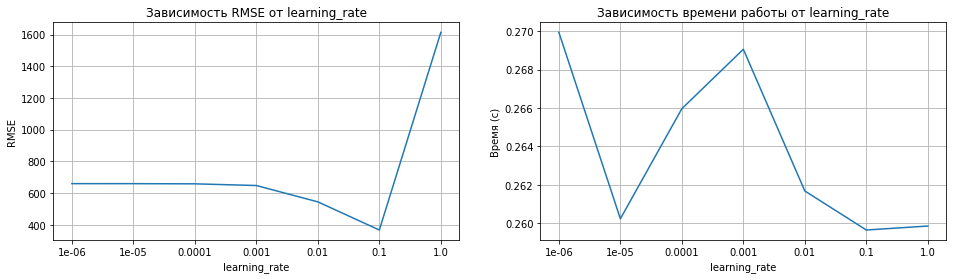

In [78]:
fig, ax = plt.subplots(1, 2, figsize = (16, 4))

ax[0].plot(np.arange(1, len(lr_range) + 1), rmse_lr['rmse'])

ax[0].set_title('Зависимость RMSE от learning_rate')
ax[0].set_xlabel('learning_rate')
ax[0].set_ylabel('RMSE')
ax[0].grid(True)
ax[0].set_xticklabels(['a'] + lr_range)
#ax[0].set_xticks(np.arange(len(lr_range)), [str(i) for i in lr_range])



ax[1].plot(np.arange(1, len(lr_range) + 1), rmse_lr['time'])
ax[1].set_title('Зависимость времени работы от learning_rate')
ax[1].set_xlabel('learning_rate')
ax[1].set_ylabel('Время (с)')
ax[1].grid(True)
ax[1].set_xticklabels(['a'] + lr_range)

#ax[1].set_xticks(lr_range)
#
fig.show()

plt.savefig('plots/GB_rmse_time_learning_rate.pdf')